In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Figure 1

In [2]:
data_df = pd.read_csv('./data/dataset_performance_index.csv')
data_df

,group,dataset,POM,bFP,cFP,Mordred,POM-Mordred,std(POM-Mordred)
0,behavior,[a] Behavior - Drosophila,69.519704,44.863506,38.054187,46.587644,22.932061,3.581974
1,receptor,[b] OR - Mosquito,32.147716,34.364148,27.291636,21.943609,10.204107,1.983656
2,human,[c] Behavior - Human,18.579188,9.385348,9.390360,8.600126,9.979063,2.663062
3,behavior,[d] Behavior - Mosquito,49.809306,8.207475,48.138825,40.106789,9.702517,5.681808
4,receptor,[e] Neuron - Drosophila,31.978762,27.938054,29.022676,23.629692,8.349069,2.568836
5,mice_neural,[f] Brain - Mouse,64.854718,52.518212,60.876716,57.250195,7.604524,2.765500
6,receptor,[g] OR - Bristletail,35.825676,27.073814,16.192117,29.901452,5.924225,1.207580
7,receptor,[e] Neuron - Bristletail,61.077065,40.673041,52.961996,55.965221,5.111843,5.139358
8,human,[h] Behavior - Human,23.140111,17.871448,16.974708,18.575761,4.564350,1.693531
9,receptor,[i] OR - Mosquito,43.779113,36.678028,28.497221,40.098007,3.681106,0.369685


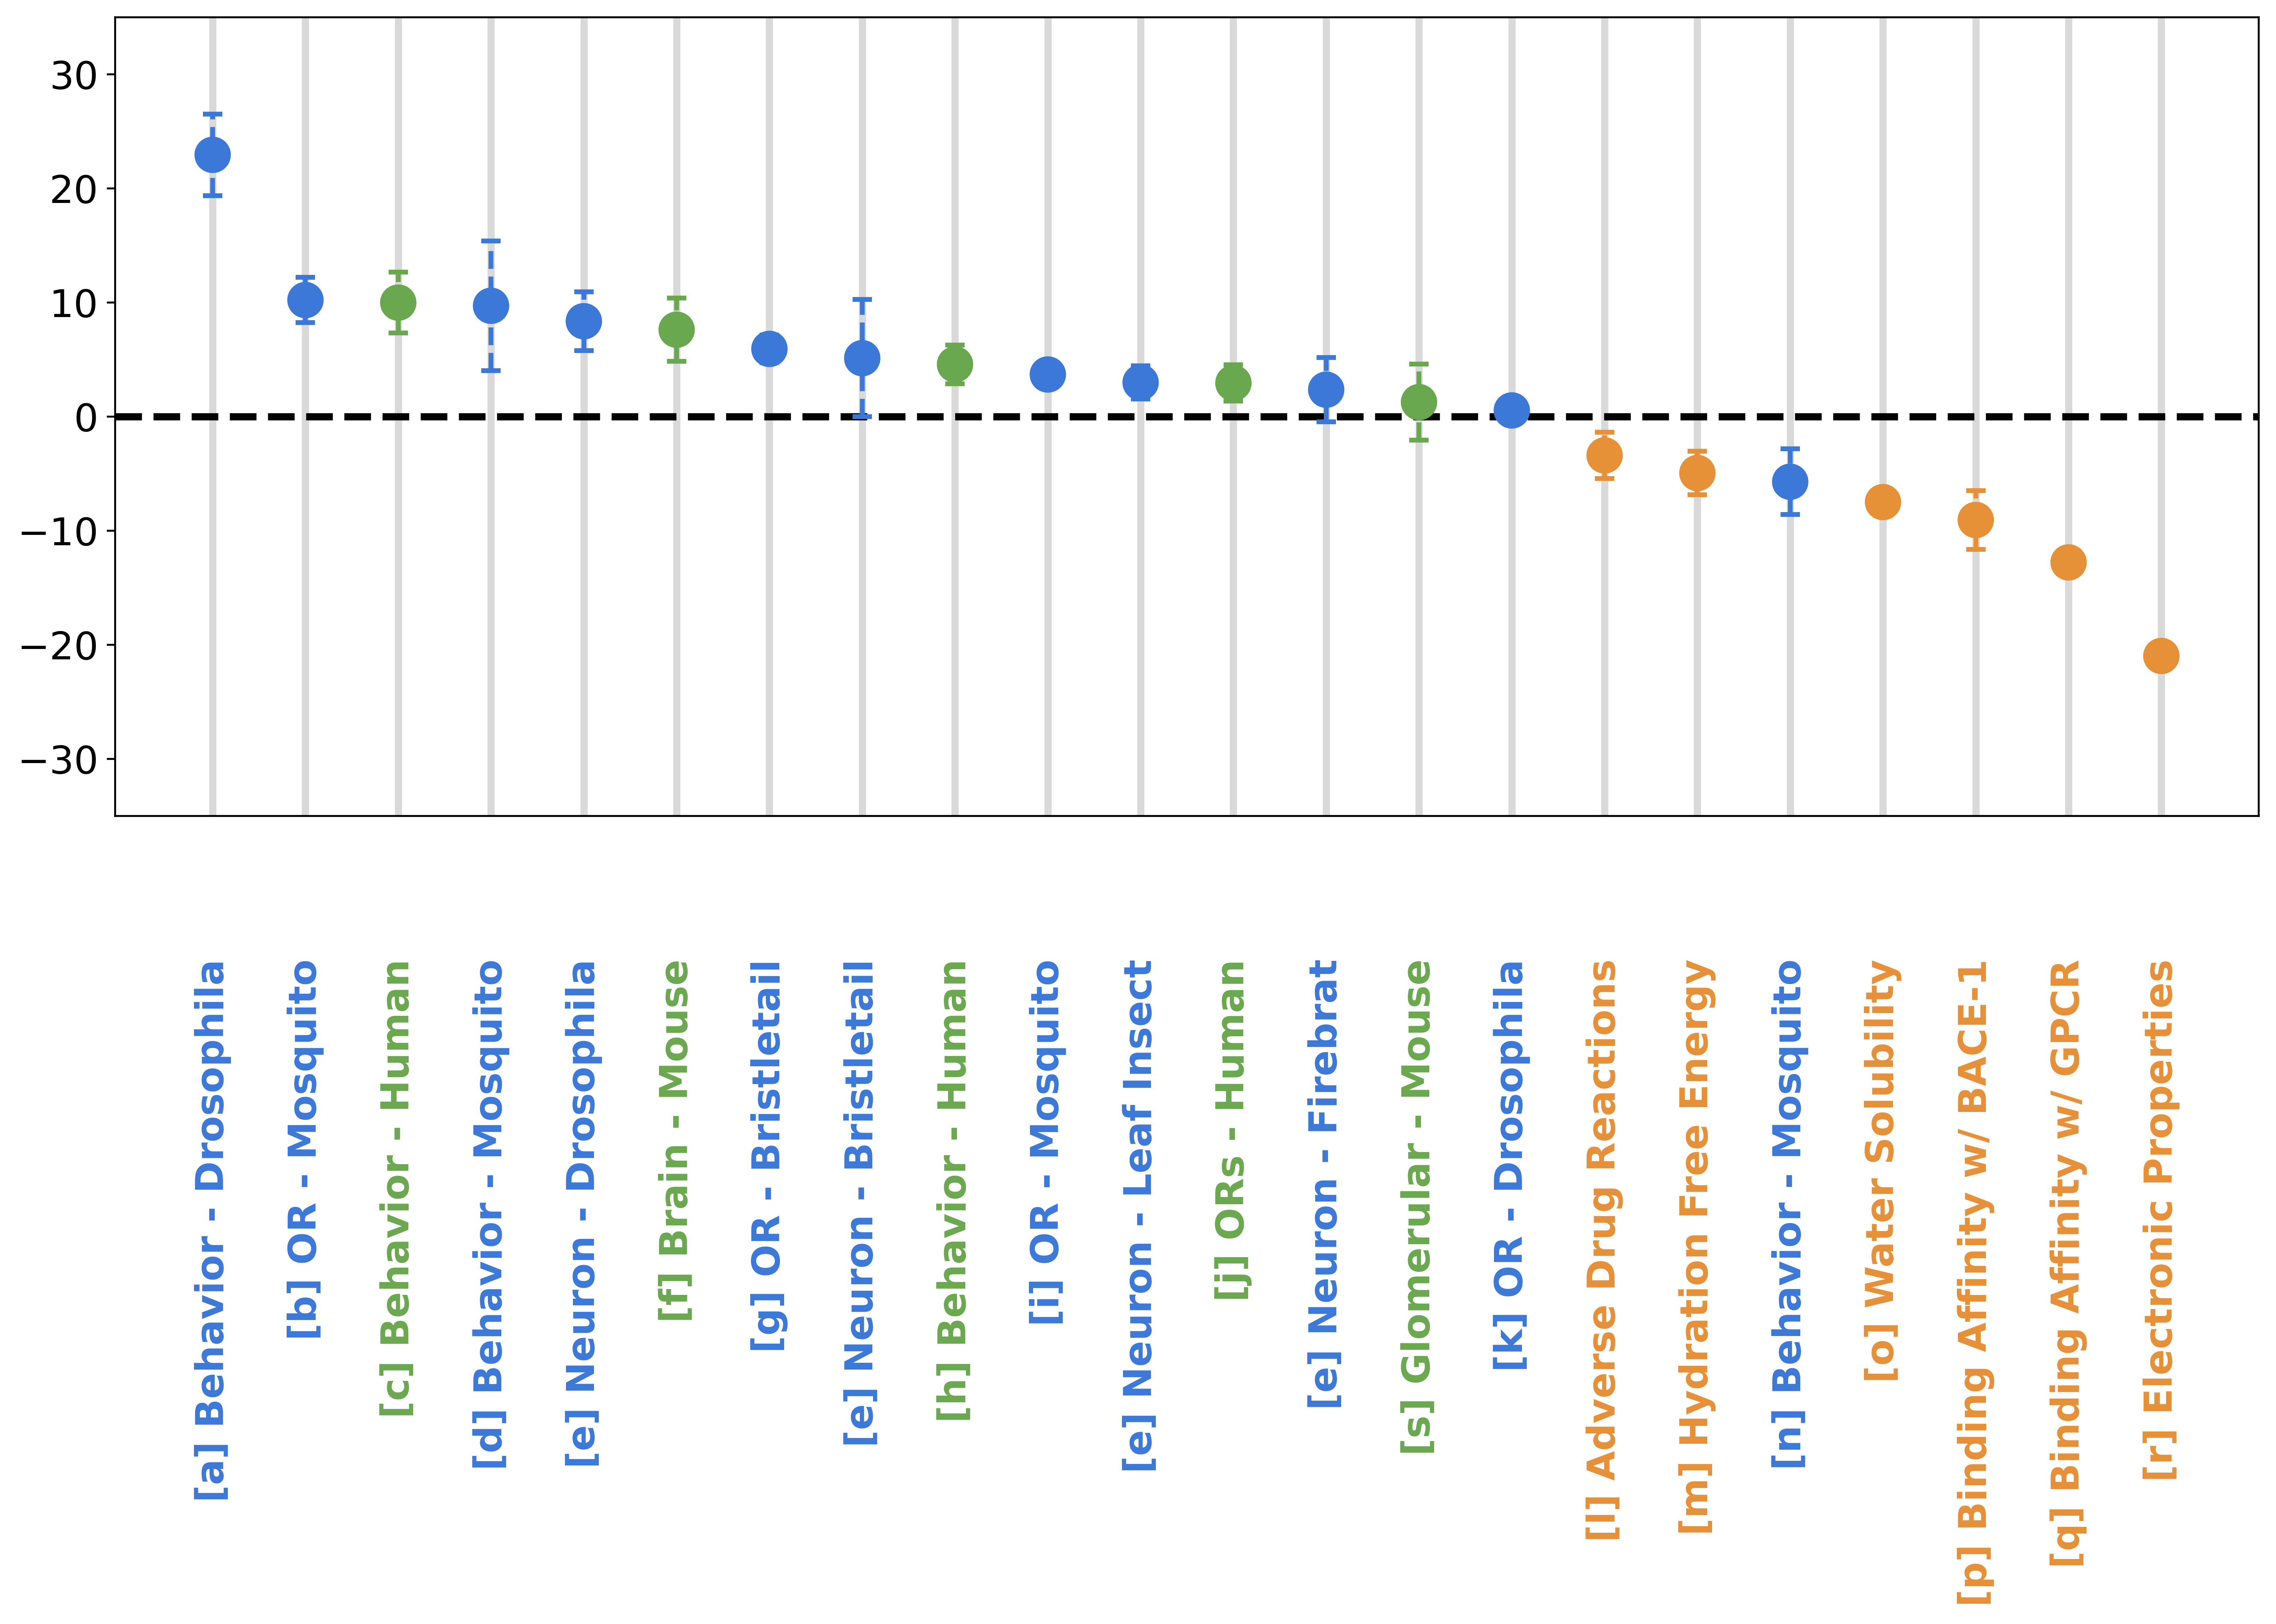

In [3]:
OTHER_COLOR = '#e69138ff'
HUMAN_COLOR = '#6aa84fff'
ANIMAL_COLOR = '#3c78d8ff'
COLOR_MAP = {
    'molnet': OTHER_COLOR,
    'gpcr_summary': OTHER_COLOR,
    'behavior': ANIMAL_COLOR,
    'receptor': ANIMAL_COLOR,
    'human': HUMAN_COLOR,
    'mice_neural': HUMAN_COLOR,
}
SCATTER_SIZE = 200
ALPHA = 1
TICK_FONTSIZE = 16

plt.figure(figsize=(16, 6), dpi=500)
ax = plt.subplot(1, 1, 1)
ax.grid(False)
ax.set_facecolor('white')
color = np.array([COLOR_MAP[v] for v in data_df['group']])
idx = data_df['POM-Mordred'].values > 0
plt.scatter(
    np.arange(len(data_df)),
    data_df['POM-Mordred'].values,
    color=color,
    s=SCATTER_SIZE,
    alpha=ALPHA,
)
for i in range(len(data_df)):
    plt.axvline(i, color='0.85', zorder=-1, lw=3)
plt.axhline(0, color='k', lw=3, zorder=0, ls='--')
plt.xticks(
    np.arange(len(data_df)),
    [v+' '*8 for v in data_df['dataset']],
    fontsize=TICK_FONTSIZE,
    weight='bold',
    rotation=90)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='x', which='major', pad=15)
plt.yticks(fontsize=TICK_FONTSIZE)
for c, t in zip(color, ax.get_xticklabels()):
    t.set_color(c)

for x, (y, err) in enumerate(zip(data_df['POM-Mordred'], data_df['std(POM-Mordred)'])):
    eb = plt.errorbar(
        x,
        y,
        err,
        fmt='none',
        capsize=4,
        color=color[x],
        capthick=2,
        elinewidth=2,
        zorder=1,
    )
    eb[-1][0].set_linestyle('--') 

plt.ylim(-35, 35)
plt.show()